In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\dell'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#To load dataset 
df=pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
#To show first 5 records 
df.head()

category                                            Message Unnamed: 2  \
0  not spam  Go until jurong point, crazy.. Available only ...        NaN   
1  not spam                      Ok lar... Joking wif u oni...        NaN   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3  not spam  U dun say so early hor... U c already then say...        NaN   
4  not spam  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
#To remove unwanted column from given dataset
#first create a list
col=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df.drop(col,axis=1,inplace=True)

In [7]:
df.head()

category                                            Message
0  not spam  Go until jurong point, crazy.. Available only ...
1  not spam                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  not spam  U dun say so early hor... U c already then say...
4  not spam  Nah I don't think he goes to usf, he lives aro...

In [8]:
#How many rows and columns in given dataset
df.shape

(5572, 2)

In [9]:
#How many samples in spam and not spam in category output column
df['category'].value_counts()

not spam    4825
spam         747
Name: category, dtype: int64

In [10]:
#create wordcloud 
from wordcloud import WordCloud,STOPWORDS
#create object of WordCloud class and passing the following parameter
#REMOVE STOPWORDS AND PUNCTUATION MARKS 
#wordcloud for spam category 
wc=WordCloud(width=800,height=800,background_color="white", 
             stopwords=STOPWORDS)


In [11]:
#to extract those message whose category ='spam'
df[df['category']=="spam"]["Message"]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object

In [12]:
content=" ".join(df[df['category']=="spam"]["Message"])
#content
#use inbuilt method generate() of WordCloud class 
wc.generate(content)

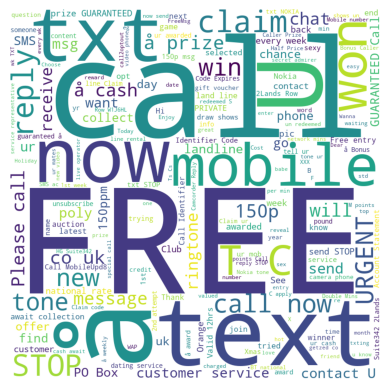

In [13]:
#To show word cloud image with the help of imshow which is inbuilt 
#method of matplotlib
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
#to show those message whose category="not spam"
#to extract those message whose category ='spam'
df[df['category']=="not spam"]["Message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 4825, dtype: object

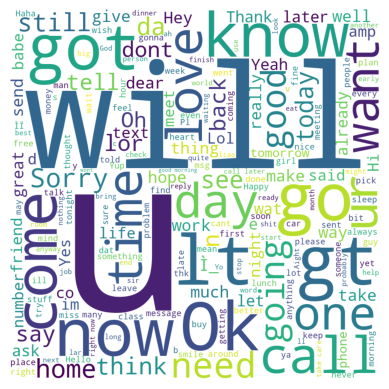

In [15]:
content=" ".join(df[df['category']=="not spam"]["Message"])
#content
#use inbuilt method generate() of WordCloud class 
wc.generate(content)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
df.head()

category                                            Message
0  not spam  Go until jurong point, crazy.. Available only ...
1  not spam                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  not spam  U dun say so early hor... U c already then say...
4  not spam  Nah I don't think he goes to usf, he lives aro...

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#create object of stopwords class and passing the parameter of english lang.
stop=stopwords.words('english')
#print(stop)
from nltk.stem import WordNetLemmatizer

In [18]:
#Apply Text Preprocessing on MEssage input column 
#first create function (user defined function)
def clean_text(msg): #clean_text() used defined function name
    #step 1 : Converts in lower case 
    msg=msg.lower()
    #step 2 : Apply word tokenizer 
    tokens=word_tokenize(msg)
    #print(tokens)
    #filtering only alphabets, sue inbuilt fucntion isalpha() : this 
    #function is used only accept alphabets(a-z)
    #use list comprehension 
    word_token=[w for w in tokens if w.isalpha()]
    #print(word_token)
    #To remove stop words 
    clean_token=[w for w in word_token if w not in stop]
    #print(clean_token)
    #Apply Lemmatisation on clean_token list
    #create object of WordNetLemmatizer class
    lemma=WordNetLemmatizer()
    final_text=[lemma.lemmatize(w,pos='v') for w in clean_token]
    return ' '.join(final_text)

In [19]:
#call function clean_text() and passing the input Message column from given dataframe df
#apply() inbuilt function 
df['Message']=df['Message'].apply(clean_text)

In [20]:
df['Message']

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5567    time try contact u pound prize claim easy call...
5568                               b go esplanade fr home
5569                                pity mood suggestions
5570    guy bitch act like interest buy something else...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [21]:
df.head()

category                                            Message
0  not spam  go jurong point crazy available bugis n great ...
1  not spam                              ok lar joke wif u oni
2      spam  free entry wkly comp win fa cup final tkts may...
3  not spam                u dun say early hor u c already say
4  not spam                nah think go usf live around though

In [22]:
#select input and output   from given dataframe 
X=df['Message'] #input features after cleaning
Y=df['category'] #output column

In [23]:
X

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5567    time try contact u pound prize claim easy call...
5568                               b go esplanade fr home
5569                                pity mood suggestions
5570    guy bitch act like interest buy something else...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [24]:
Y

0       not spam
1       not spam
2           spam
3       not spam
4       not spam
          ...   
5567        spam
5568    not spam
5569    not spam
5570    not spam
5571    not spam
Name: category, Length: 5572, dtype: object

In [25]:
Y.unique()

array(['not spam', 'spam'], dtype=object)

In [26]:
#Apply Label Encoder on output variable Y , to converts object type data to numeric type
from sklearn.preprocessing import LabelEncoder

In [27]:
#create object of  LabelEncoder class 
le=LabelEncoder()
Y=le.fit_transform(Y)

In [28]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
Y.dtype

dtype('int32')

In [30]:
X

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5567    time try contact u pound prize claim easy call...
5568                               b go esplanade fr home
5569                                pity mood suggestions
5570    guy bitch act like interest buy something else...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [31]:
#split input and output into 70%-30% , train_test_split()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
X_train.shape,Y_train.shape

((3900,), (3900,))

In [33]:
X_test.shape,Y_test.shape

((1672,), (1672,))

In [34]:
#Apply countvectorizer on input data means X_train and X_test  
#call inbuilt class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#create the object of CountVectorizer class
cv=CountVectorizer()

In [36]:
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)

In [37]:
X_train_cv

<3900x5161 sparse matrix of type '<class 'numpy.int64'>'
	with 29663 stored elements in Compressed Sparse Row format>

In [38]:
X_test_cv

<1672x5161 sparse matrix of type '<class 'numpy.int64'>'
	with 11580 stored elements in Compressed Sparse Row format>

In [39]:
#to show columns 
cv.get_feature_names_out()

array(['aah', 'aaooooright', 'aathi', ..., 'åòit', 'åômorrow', 'ìï'],
      dtype=object)

In [40]:
pd.set_option('display.max_columns',None)
cv.get_feature_names_out()

array(['aah', 'aaooooright', 'aathi', ..., 'åòit', 'åômorrow', 'ìï'],
      dtype=object)

In [41]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
#create a new dataframe 
df1=pd.DataFrame(X_train_cv.toarray(),columns=cv.get_feature_names_out())
df1.head()

aah  aaooooright  aathi  ab  abbey  abeg  abel  abi  ability  abiola  abj  \
0    0            0      0   0      0     0     0    0        0       0    0   
1    0            0      0   0      0     0     0    0        0       0    0   
2    0            0      0   0      0     0     0    0        0       0    0   
3    0            0      0   0      0     0     0    0        0       0    0   
4    0            0      0   0      0     0     0    0        0       0    0   

   able  abnormally  aboutas  abroad  absolutely  absolutly  abstract  abt  \
0     0           0        0       0           0          0         0    0   
1     0           0        0       0           0          0         0    0   
2     0           0        0       0           0          0         0    0   
3     0           0        0       0           0          0         0    0   
4     0           0        0       0           0          0         0    0   

   abta  aburo  abusers  ac  academic  acc  accent  accenture  accept  access  \
0     0      0        0   0         0    0       0          0       0       0   
1     0      0        0   0         0    0       0          0       0       0   
2     0      0        0   0         0    0       0          0       0       0   
3     0      0        0   0         0    0       0          0       0       0   
4     0      0        0   0         0    0       0          0       0       0   

   accessible  accidant  accident  accidentally  accommodation  \
0           0         0         0             0              0   
1           0         0         0             0              0   
2           0         0         0             0              0   
3           0         0         0             0              0   
4           0         0         0             0              0   

   accommodationvouchers  accomodate  accomodations  accordin  accordingly  \
0                      0           0              0         0            0   
1                      0           0              0         0            0   
2                      0           0              0         0            0   
3                      0           0              0         0            0   
4                      0           0              0         0            0   

   account  accumulation  ache  acid  acnt  aco  across  act  actin  action  \
0        0             0     0     0     0    0       0    0      0       0   
1        0             0     0     0     0    0       0    0      0       0   
2        0             0     0     0     0    0       0    0      0       0   
3        0             0     0     0     0    0       0    0      0       0   
4        0             0     0     0     0    0       0    0      0       0   

   activate  active  activities  actor  actual  actually  ad  adam  add  \
0         0       0           0      0       0         0   0     0    0   
1         0       0           0      0       0         0   0     0    0   
2         0       0           0      0       0         0   0     0    0   
3         0       0           0      0       0         0   0     0    0   
4         0       0           0      0       0         0   0     0    0   

   addamsfa  addict  addie  address  adi  adjustable  admin  administrator  \
0         0       0      0        0    0           0      0              0   
1         0       0      0        0    0           0      0              0   
2         0       0      0        0    0           0      0              0   
3         0       0      0        0    0           0      0              0   
4         0       0      0        0    0           0      0              0   

   admirer  admission  adore  adress  ads  adsense  adult  adults  advance  \
0        0          0      0       0    0        0      0       0        0   
1        0          0      0       0    0        0      0       0        0   
2        0          0      0       0    0        0      0       0      

In [43]:
#Model train with the help of DecisionTreeClassifier Algorithm 
#bcoz  we have classification dataset , we predict given message is spam or not spam
#call inbuilt class DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [44]:
#create the object of DecisionTreeClassifier class : by default gini index (1-P**2-Q**2)
dt=DecisionTreeClassifier(random_state=1)

In [45]:
#Train the model with 70% data with DecisionTreeClassifier 
dt.fit(X_train_cv,Y_train)

DecisionTreeClassifier(random_state=1)

In [46]:
#Test the model with 30% input (X_test_cv)
Y_pred=dt.predict(X_test_cv)

In [47]:
#generate classification report and confusion matrix 
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(Y_test,Y_pred))

[[1431   23]
 [  34  184]]


In [49]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1454
           1       0.89      0.84      0.87       218

    accuracy                           0.97      1672
   macro avg       0.93      0.91      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [50]:
#To show information gain of each column :- use inbuilt feature_importances_
dt.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
pd.set_option('display.max_rows',None)
df2=pd.DataFrame({'Input Columns':cv.get_feature_names_out(),'IG':dt.feature_importances_})
#IG means information gain
#df2.sort_values('IG',ascending=False)

In [ ]:
#use neural network ANN : Artificial neural network 
#required tensorflow with keras 
